## Algoritma Lotka-Volterra

1. initialize prey_population, predator_population, prey_birth_fraction, prey_death_fraction, predator_birth_fraction, predator_death_fraction, simulation_length, delta_t
2. simulation_length := simulation_length/delta_t 
3. change_in_prey := (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
4. change_in_predator := (predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
5. for i from 1 through simulation_length do the following
        t := i*Delta_t
        prey_population := prey_population + change_in_prey*delta_t
        predator_population := predator_population + change_in_predator*delta_t
        change_in_prey := (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
        change_in_predator := (predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
        display (t,prey_population,predator_population)
   end
6. stop

,waktu,populasi_mangsa,populasi_pemangsa
0,0.00,100.000000,15.000000
1,0.01,101.700000,14.991000
2,0.02,103.429083,14.984554
3,0.03,105.187697,14.980701
4,0.04,106.976294,14.979485
...,...,...,...
1196,11.96,319.042869,19.746827
1197,11.97,324.163710,20.167519
1198,11.98,329.339469,20.607501
1199,11.99,334.568885,21.067748


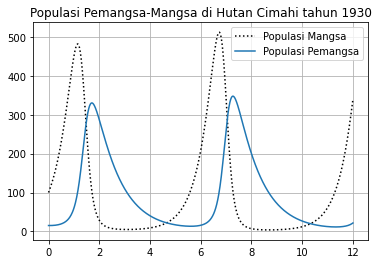

In [2]:
# Program
import matplotlib.pyplot as plt
import pandas as pd
# diambil dari Equation Set 4.2.1 buku A.B Shiflet

def Hunter_Prey(simulationLength,delta_t):
    numIteration = int(simulationLength/delta_t)+1
    predator_population = 15
    predator_birth_fraction = 0.01
    predator_death_fraction = 1.06
    prey_population = 100
    prey_birth_fraction = 2
    prey_death_fraction = 0.02
    
    change_in_prey = (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
    change_in_predator = (predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
    
    arr_t = [0 for i in range(numIteration)]
    arr_predator_population = [0 for i in range(numIteration)]
    arr_prey_population = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_predator_population[0] = predator_population
    arr_prey_population[0] = prey_population
    
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = t
        prey_population = prey_population + change_in_prey*delta_t
        arr_prey_population[i] = prey_population
        predator_population = predator_population + change_in_predator*delta_t
        arr_predator_population[i] = predator_population
        
        change_in_prey = (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
        change_in_predator = (predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
        
    return(arr_t,arr_prey_population,arr_predator_population)

df = pd.DataFrame(Hunter_Prey(12,0.01))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi_mangsa',2:'populasi_pemangsa'})
display(df)


plt.title("Populasi Pemangsa-Mangsa di Hutan Cimahi tahun 1930")
plt.plot(df.waktu,df.populasi_mangsa,":",color="black",label = "Populasi Mangsa")
plt.plot(df.waktu,df.populasi_pemangsa,label = "Populasi Pemangsa")
plt.grid(True)
plt.legend()
plt.show()
 

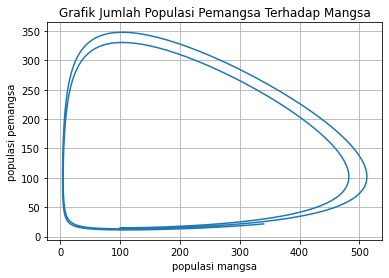

In [5]:
plt.title("Grafik Jumlah Populasi Pemangsa Terhadap Mangsa")
plt.plot(df.populasi_mangsa,df.populasi_pemangsa)
plt.xlabel("populasi mangsa")
plt.ylabel("populasi pemangsa")
plt.grid(True)
plt.show()


## Algoritma Pemangsa-Mangsa Terbatas

1. initialize prey_population, predator_population, prey_birth_fraction, prey_death_fraction, predator_birth_fraction, predator_death_fraction, simulation_length, delta_t, prey_capacity_maximum, predator_capacity_maximum
2. simulation_length := simulation_length/delta_t 
3. change_in_prey := (1-prey_population/prey_capacity_maximum)*(prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
4. change_in_predator := (1-predator_population/predator_capacity_maximum)*(predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
5. for i from 1 through simulation_length do the following
        t := i*Delta_t
        prey_population := prey_population + change_in_prey*delta_t
        predator_population := predator_population + change_in_predator*delta_t
        change_in_prey := (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
        change_in_predator := (predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
        display (t,prey_population,predator_population)
   end
6. stop

      waktu  populasi_mangsa  populasi_pemangsa
0      0.00       100.000000          50.000000
1      0.01       101.000000          49.985000
2      0.02       102.010303          49.972500
3      0.03       103.030967          49.962526
4      0.04       104.062049          49.955103
...     ...              ...                ...
1196  11.96       381.290700         100.000000
1197  11.97       381.290700         100.000000
1198  11.98       381.290700         100.000000
1199  11.99       381.290700         100.000000
1200  12.00       381.290700         100.000000

[1201 rows x 3 columns]


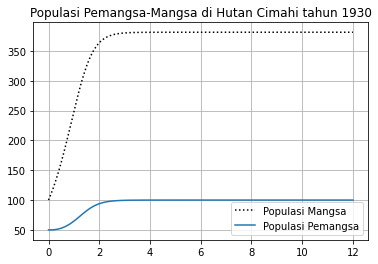

In [11]:
# Program
import matplotlib.pyplot as plt
import pandas as pd

def Hunter_Prey(simulationLength,delta_t):
    numIteration = int(simulationLength/delta_t)+1
    predator_population = 50
    predator_birth_fraction = 0.01
    predator_death_fraction = 1.06
    predator_maximum_capacity = 100
    prey_population = 100
    prey_birth_fraction = 2
    prey_death_fraction = 0.02
    change_in_prey = (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
    change_in_predator =(1-predator_population/predator_maximum_capacity)*(predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
    
    arr_t = [0 for i in range(numIteration)]
    arr_predator_population = [0 for i in range(numIteration)]
    arr_prey_population = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_predator_population[0] = predator_population
    arr_prey_population[0] = prey_population
    
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = t
        prey_population = prey_population + change_in_prey*delta_t
        arr_prey_population[i] = prey_population
        predator_population = predator_population + change_in_predator*delta_t
        arr_predator_population[i] = predator_population
        
        change_in_prey = (prey_birth_fraction - prey_death_fraction*predator_population)*prey_population
        change_in_predator =(1-predator_population/predator_maximum_capacity)*(predator_birth_fraction*prey_population - predator_death_fraction)*predator_population
       
    return(arr_t,arr_prey_population,arr_predator_population)

df = pd.DataFrame(Hunter_Prey(12,0.01))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi_mangsa',2:'populasi_pemangsa'})
print(df)

plt.title("Populasi Pemangsa-Mangsa di Hutan Cimahi tahun 1930")
plt.plot(df.waktu,df.populasi_mangsa,":",color="black",label = "Populasi Mangsa")
plt.plot(df.waktu,df.populasi_pemangsa,label = "Populasi Pemangsa")
plt.grid(True)
plt.legend()
plt.show()

## Soal no.3 Excercise Hal 125 

Diketahui : 

 * Pertumbuhan populasi krill seperti pada pemodelan sebelumnya namun yang berbeda pada tingkat kelahiran krill mengikuti fungsi logistik
 * Pertumbuhan populasi paus biru seperti fungsi logistik tetapi carrying capacitynya mengikuti jumlah populasi paus biru dan krill pada waktu t-$\Delta\$t
 
 * Jadi persamaan diferensial untuk pertumbuhan populasi krill ($\frac{dS}{dt}$) dan populasi paus biru ($\frac{dB}{dt}$) adalah
 
     * $\frac{dS}{dt} = (1-\frac{S}{M})k\scriptsize s\ S- k\scriptsize sb\ SB $
     * $\frac{dB}{dt} = (1-\frac{B}{BS})k\scriptsize bs\ BS - k\scriptsize b\ B$
 